<a href="https://colab.research.google.com/github/enikolaev/MMO/blob/main/Lesson%2010.%20Dimensionality%20Reduction/LabWork10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лаборатороная работа 10. Снижение размерности

## Подключение библиотек и загрузка данных

In [1]:
# подключение библиотек
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка данных
dataset=pd.read_csv('stars type.csv',index_col=0)
dataset.head()

,Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
Temperature (K),,,,,,
3068,0.002400,0.1700,16.12,0,Red,M
3042,0.000500,0.1542,16.60,0,Red,M
2600,0.000300,0.1020,18.70,0,Red,M
2800,0.000200,0.1600,16.65,0,Red,M
1939,0.000138,0.1030,20.06,0,Red,M


In [2]:
# Проверяем наличие пропусков в данных (убеждаемся, что их нет!)
dataset.isnull().sum()

,0
Luminosity(L/Lo),0
Radius(R/Ro),0
Absolute magnitude(Mv),0
Star type,0
Star color,0
Spectral Class,0


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Предположим, что dataset - это твой DataFrame
# dataset = ...

# Выбираем только числовые столбцы
numerical_cols = dataset.select_dtypes(include=['number']).columns
numerical_df = dataset[numerical_cols]

# Применяем StandardScaler только к числовым столбцам
scaler = StandardScaler()
wine_df = pd.DataFrame(data=scaler.fit_transform(numerical_df),
columns=numerical_df.columns)

kmeans = KMeans(n_clusters=3)
cluster = kmeans.fit_predict(wine_df)

print(wine_df)

     Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  Star type
0           -0.598624     -0.459210                1.116745   -1.46385
1           -0.598624     -0.459241                1.162414   -1.46385
2           -0.598624     -0.459342                1.362213   -1.46385
3           -0.598624     -0.459229                1.167171   -1.46385
4           -0.598624     -0.459340                1.491607   -1.46385
..                ...           ...                     ...        ...
235          1.494720      2.167974               -1.361718    1.46385
236          4.059319      1.854068               -1.428317    1.46385
237          2.403157      2.297800               -1.437832    1.46385
238          1.662878      1.695177               -1.485403    1.46385
239          1.048345      2.995370               -1.159064    1.46385

[240 rows x 4 columns]


## Линейные методы

### Анализ главных компонент (Principal Component Analysis, PCA)

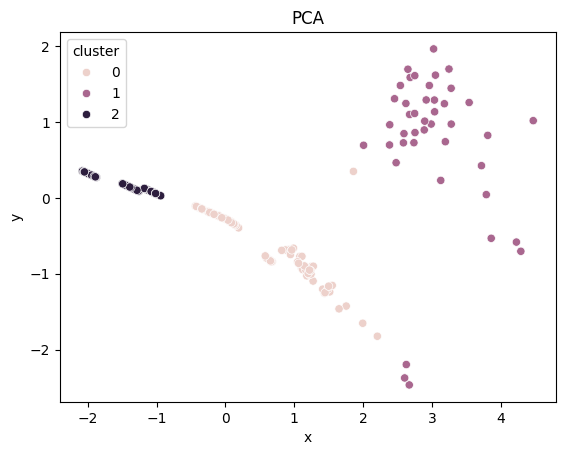

In [9]:
from sklearn.decomposition import PCA
import seaborn as sns

pca2D = PCA(n_components=2)
#dimensions
pca_2D = pca2D.fit_transform(wine_df)
pca2D_df = pd.DataFrame(data = pca_2D, columns = ['x', 'y'])

pca2D_df['cluster'] = cluster

sns.scatterplot(x='x', y='y', hue='cluster', data=pca2D_df)
plt.title("PCA")
plt.show()

### Анализ независимых компонент (ICA, Independent Computing Architecture)

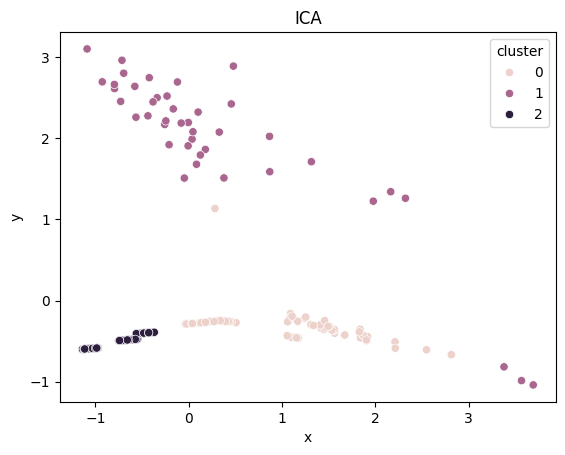

In [10]:
from sklearn.decomposition import FastICA

ica2D = FastICA(n_components=2)
ica_data2D = ica2D.fit_transform(wine_df)
ica2D_df = pd.DataFrame(data =  ica_data2D,columns = ['x', 'y'])

ica2D_df['cluster'] = cluster

sns.scatterplot(x='x', y='y', hue='cluster', data=ica2D_df)
plt.title("ICA")
plt.show()

### Усеченная декомпозиция сингулярных значений (TruncatedSVD, Truncated Singular Value Decomposition)

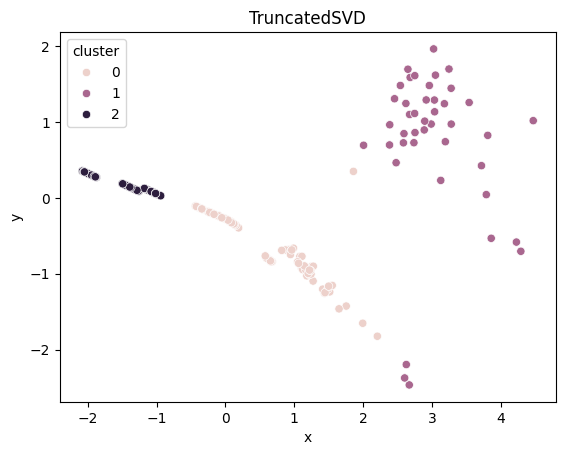

In [11]:
from sklearn.decomposition import TruncatedSVD

tsvd2D = TruncatedSVD(n_components=2)
tsvd_data2D = tsvd2D.fit_transform(wine_df)
tsvd2D_df = pd.DataFrame(data =  tsvd_data2D, columns = ['x', 'y'])

tsvd2D_df['cluster']  = cluster

sns.scatterplot(x='x', y='y', hue='cluster', data=tsvd2D_df)
plt.title("TruncatedSVD")
plt.show()

## Нелинейные методы

### Многомерное масштабирование (MDS, Multidimensional Scaling）

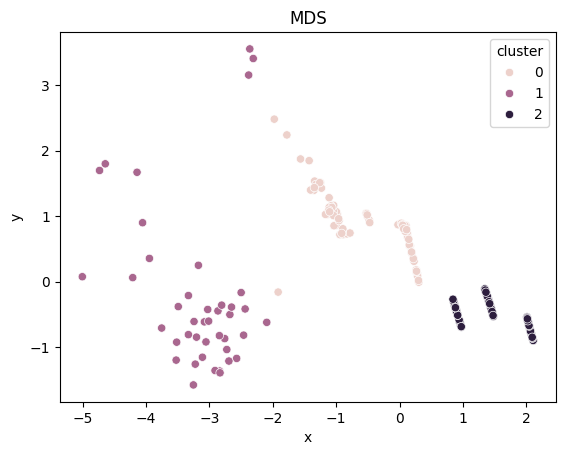

In [12]:
from sklearn.manifold import MDS

mds2D = MDS(n_components=2)

mds_data2D = mds2D.fit_transform(wine_df)
mds2D_df = pd.DataFrame(data =  mds_data2D, columns = ['x', 'y'])

mds2D_df['cluster'] = cluster

sns.scatterplot(x='x', y='y', hue='cluster', data=mds2D_df)
plt.title("MDS")
plt.show()

### Стохастическое вложение соседей с t-распределением (t-SNE, t-Distributed Stochastic Neighbor Embedding)

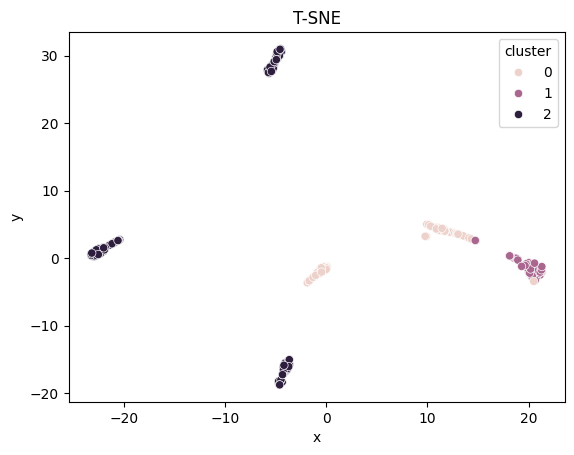

In [13]:
from sklearn.manifold import TSNE

tsne2D = TSNE(n_components=2)
tsne_data2D = tsne2D.fit_transform(wine_df)
tsne2D_df = pd.DataFrame(data =  tsne_data2D, columns = ['x', 'y'])

tsne2D_df['cluster'] = cluster

sns.scatterplot(x='x', y='y', hue='cluster', data=tsne2D_df)
plt.title("T-SNE")
plt.show()

### Метод равномерного приближения и проекции (UMAP, Uniform Manifold Approximation and Projection)

In [14]:
!pip install umap-learn

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


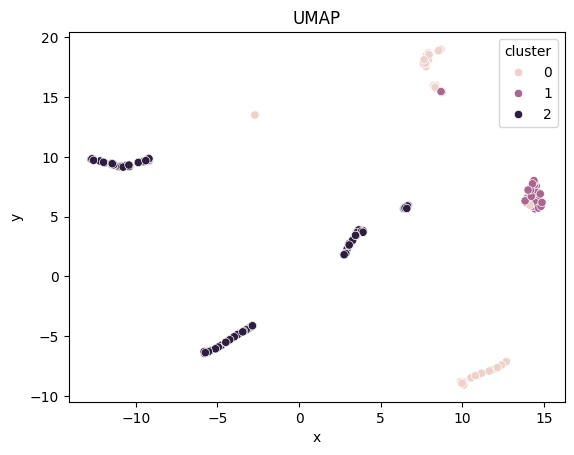

In [15]:
import umap

umap2D = umap.UMAP(n_components=2)
umap_data2D = umap2D.fit_transform(wine_df)
umap2D_df = pd.DataFrame(data =  umap_data2D,columns = ['x', 'y'])

umap2D_df['cluster'] = cluster

sns.scatterplot(x='x', y='y', hue='cluster', data=umap2D_df)
plt.title("UMAP")
plt.show()